# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd


## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv('craftcans.csv')
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


## How many rows do you have in the data? What are the column types?

In [3]:

df.shape

# I have 2416 rows

(2416, 7)

In [4]:
df.dtypes

# Column types are all objects!

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [5]:
topbreweries = df.groupby("Brewery")["Beer"].nunique().sort_values(ascending=False)
topbreweries.head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           41
Sun King Brewing Company      38
Cigar City Brewing Company    24
Sixpoint Craft Ales           24
Great Crescent Brewery        20
21st Amendment Brewery        19
SanTan Brewing Company        19
Upslope Brewing Company       18
Great River Brewery           18
Name: Beer, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [6]:
df.describe()

# the most common ABV is 5.00%

,Beer,Brewery,Location,Style,Size,ABV,IBUs
count,2416,2410,2410,2405,2410,2348,2410
unique,2306,551,401,99,16,74,108
top,Nonstop Hef Hop,Brewery Vivant,"Grand Rapids, MI",American IPA,12 oz.,5.00%,Does not apply
freq,12,62,66,424,1507,215,1005


## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [7]:
df["ABV"]

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [8]:
ABVlist = df["ABV"]
ABVnew = ABVlist.str.replace("%","")
df["ABV"] = ABVnew
df["ABV"]

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [9]:
df["ABV"] = ABVnew.astype(float)
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [10]:
df["ABV"].mean()

5.977342419080068

<Axes: >

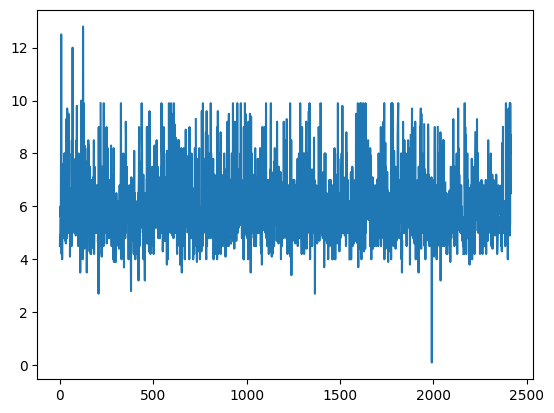

In [11]:
df["ABV"].plot()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [12]:
df["ABV"].isnull().value_counts()
# 68 beers don't have ABV

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [13]:
top10cities = df.groupby("Location")['Beer'].nunique().sort_values(ascending=False)
top10cities.head(10)

Location
Grand Rapids, MI     66
Chicago, IL          52
Indianapolis, IN     43
Boulder, CO          41
Portland, OR         41
Denver, CO           40
San Diego, CA        38
Brooklyn, NY         37
Seattle, WA          35
San Francisco, CA    31
Name: Beer, dtype: int64

## List all of the beer from Brooklyn, NY

In [14]:
brooklynbeer = df[df["Location"] == "Brooklyn, NY"]
# filter down to location brooklyn, NY
brooklynbeer

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most different cans of beer?

In [15]:
brooklynbeer.groupby('Brewery')['Beer'].nunique().sort_values(ascending = False)
# Sixpoint Craft Ales puts out the most different cans of beer

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        5
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Beer, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [16]:
sixpoint = brooklynbeer[brooklynbeer['Brewery'] == 'Sixpoint Craft Ales']
fivetopstyles = sixpoint.groupby('Style')['Beer'].nunique().sort_values(ascending = False)
fivetopstyles.head()

Style
American IPA                      4
American Double / Imperial IPA    2
Baltic Porter                     2
Cream Ale                         2
German Pilsener                   2
Name: Beer, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [17]:
NYbrew = df[df["Location"].str.contains('NY', case = True, flags = 0, na = False, regex = True)]
NYbrew

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,Does not apply
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,Does not apply
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,Does not apply
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,Does not apply


In [18]:
NYbrew['Brewery'].unique()

array(['Sixpoint Craft Ales', 'Evil Twin Brewing', 'Chatham Brewing',
       'Newburgh Brewing Company', 'Southampton Publick House',
       'Montauk Brewing Company', 'Matt Brewing Company',
       'The Bronx Brewery', 'KelSo Beer Company', 'Brooklyn Brewery',
       'The Manhattan Brewing Company', 'Blue Point Brewing Company',
       'Bomb Beer Company', 'Dundee Brewing Company',
       'Upstate Brewing Company', 'Butternuts Beer and Ale'], dtype=object)

### Now *count* all of the breweries in New York state

In [19]:
NYbrew['Brewery'].nunique()

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [20]:
IPAonly = df[df["Style"].str.contains('IPA', case = True, flags = 0, na = False, regex = True)]
IPAonly

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100


In [21]:
IPAonly['Beer'].unique()

array(['Get Together', 'Citra Ass Down', 'Rico Sauvin', 'Pile of Face',
       'Habitus (2014)', 'Solis', 'Habitus', 'Villager', 'HopArt',
       'Boy King', 'Rumble', 'Lasso', 'Titan IPA', 'Nordskye',
       "98 Problems (Cuz A Hop Ain't One)", 'Grapefruit IPA',
       'Train Hopper', 'Thai.p.a', 'The 26th', 'The Gadget', 'Galaxyfest',
       'Citrafest', 'Gone A-Rye', 'Linnaeus Mango IPA', 'Heavy Lifting',
       'Grapefruit Sculpin', 'Liberty Ale', 'Raja', 'Galaxy IPA',
       'Mosaic Single Hop IPA', 'Lost Galaxy', 'Jah Mon', 'IPA',
       'Hop Session', 'Easy Jack', 'Flying Mouse 4', 'Moar',
       'Uber Lupin Schwarz IPA', 'Todd the Axe Man',
       'Barrel Aged Triomphe', 'Monkey Dancing On A Razor Blade',
       'Vinyl Frontier', 'Disco Superfly', 'Misty Mountain Hop',
       'One-Hit Wonderful', 'Love In An Ellavator', 'Soul Doubt',
       'Bimini Twist', 'Pump House IPA', 'Suicide Blonde IPA',
       'Long Leaf', 'Double Duckpin', 'Hop A-Peel', 'Nuit Serpent',
       'Wobble'

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [22]:
df['IBUs'].tolist()

['50',
 '26',
 '19',
 '38',
 '25',
 '47',
 '68',
 '80',
 '25',
 '42',
 '25',
 '21',
 '13',
 '17',
 '68',
 '38',
 'Does not apply',
 '65',
 '20',
 '18',
 '15',
 '80',
 '65',
 '45',
 '100',
 '85',
 '24',
 '100',
 '30',
 '28',
 '19',
 '16',
 '17',
 '42',
 'Does not apply',
 'Does not apply',
 'Does not apply',
 'Does not apply',
 'Does not apply',
 'Does not apply',
 'Does not apply',
 'Does not apply',
 'Does not apply',
 'Does not apply',
 'Does not apply',
 'Does not apply',
 '75',
 'Does not apply',
 'Does not apply',
 '35',
 '54',
 'Does not apply',
 'Does not apply',
 'Does not apply',
 '12',
 '47',
 '10',
 '15',
 'Does not apply',
 '65',
 '40',
 '35',
 '72',
 'Does not apply',
 '50',
 'Does not apply',
 '20',
 '12',
 '90',
 '75',
 'Does not apply',
 '46',
 '64',
 '31',
 '37',
 '27',
 'Does not apply',
 'Does not apply',
 'Does not apply',
 '90',
 '58',
 'Does not apply',
 'Does not apply',
 'Does not apply',
 '29',
 '23',
 'Does not apply',
 '45',
 '22',
 '90',
 '20',
 'Does not ap

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [33]:
def int_fixer(num):
    try:
        return int(num)
    except:
        return None
# attempt to convert NaN or return None
# TA gave me this function

In [34]:
# I added na_values=[0] to the top of notebook

IBUcleaned = df[df['IBUs'] != "Does not apply"]
# IBUcleaned['IBUs'].tolist()
# IBUcleaned['IBUs'].astype(int)
# IBUcleaned2 = df[IBUcleaned['IBUs'] != 'NaN']
# IBUcleaned2['IBUs'].astype(int)


IBUcleaned['IBUs'] = IBUcleaned['IBUs'].apply(int_fixer)
IBUcleaned['IBUs'].mean(skipna = True)

# skipna = when you see an NA value just ignore it



/var/folders/j5/_x24kb9934g6fmf7x7r16dx00000gn/T/ipykernel_21601/1213600029.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBUcleaned['IBUs'] = IBUcleaned['IBUs'].apply(int_fixer)


42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

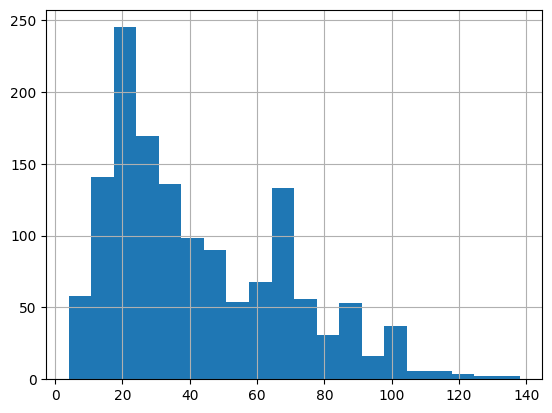

In [36]:
IBUcleaned['IBUs'].hist(bins = 20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [52]:
IBUcleaned['IBUs'].describe()



count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [56]:
IBUcleaned.query('IBUs > 64')['Beer'].tolist()

['Citra Ass Down',
 'London Balling',
 'Rico Sauvin',
 'Pile of Face',
 'Excess IPL',
 'Hoponius Union',
 'Habitus (2014)',
 'Solis',
 'Habitus',
 'Yeti Imperial Stout',
 "98 Problems (Cuz A Hop Ain't One)",
 'Train Hopper',
 'Csar',
 'Saucy Intruder',
 'The Gadget',
 'Gone A-Rye',
 'Heavy Lifting',
 'Jah Mon',
 'Flying Mouse 4',
 'Citra Ass Down',
 'Soul Doubt',
 'Bimini Twist',
 'Long Leaf',
 'Double Duckpin',
 'Hop A-Peel',
 'Wobble',
 'Hopkick Dropkick',
 'Union Jack',
 'India Pale Ale',
 'Self Starter',
 'Nugget Nectar',
 'Mission IPA',
 'Bay of Bengal Double IPA (2014)',
 'Newport Storm IPA',
 'Clean Shave IPA',
 'Big Star White IPA',
 'Firestarter India Pale Ale',
 'Back Bay IPA',
 '4000 Footer IPA',
 'Unchained #18 Hop Silo',
 'Harness the Winter',
 'Rule G IPA',
 'Yellow Wolf Imperial IPA',
 'Third Eye Enlightened Pale Ale',
 'The Green Room',
 '2014 IPA Cicada Series',
 'Sinister Minister Black IPA',
 'O’Malley’s IPA',
 'Perpetual Darkness',
 'Watershed IPA',
 'Hoodoo Voodoo 

## List all of the beers with IBUs below the 25th percentile

In [57]:
IBUcleaned.query('IBUs < 21')['Beer'].tolist()

["Wall's End",
 "Sho'nuff",
 'Bloody Show',
 'The Brown Note',
 'House Lager',
 'Leisure Time',
 'Park',
 'Westfalia',
 'KSA',
 'Sparkle',
 'Hotbox Brown',
 'Gold',
 'Cafe Leche',
 'Damascene Apricot Sour',
 'Sex Panther',
 'Vanilla Porter',
 'Gose',
 'Vermont Pilsner',
 'Ginger Peach Saison',
 'Weissenheimer',
 'Passion Fruit Prussia',
 'Send Help',
 'The Brown Note',
 'Daft Funk',
 'Bat Outta Helles',
 'Rye Wit',
 'Yo Soy Un Berliner',
 "Farmer's Daughter Blonde",
 'Honey Rye',
 'Honey Badger Blonde',
 'Old Pro',
 'Vanilla Java Porter',
 'Saddle Bronc Brown Ale',
 'Bomber Mountain Amber Ale',
 'Jammer',
 'Blackberry Wheat',
 'Rhode Island Blueberry',
 'Watermelon Ale',
 'Watermelon Ale',
 'Bunker Hill Blueberry Ale',
 'Deception',
 'P-Town Pilsner',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop'

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [64]:
# I think i fixed the NaN thing at an earlier cell with skipna

IBUcleaned.groupby('Style')['IBUs'].median().sort_values(ascending = False)

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Herbed / Spiced Beer                  15.0
Light Lager                           12.0
Gose                                  10.0
American Adjunct Lager                 9.0
Berliner Weissbier                     8.0
Name: IBUs, Length: 90, dtype: float64

<Axes: ylabel='Style'>

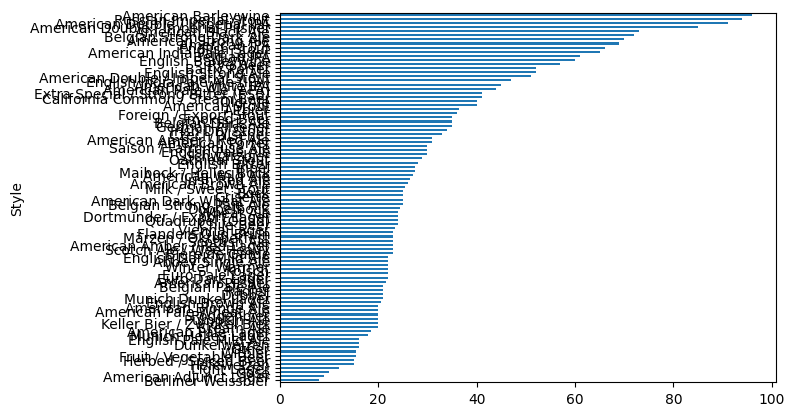

In [71]:
IBUcleaned.groupby('Style')['IBUs'].median().sort_values(ascending = True).plot(kind='barh')

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [77]:
# lets find specific beers with IBUs higher than 75th percentile
highIBU = IBUcleaned.query('IBUs > 64')

In [83]:
# find most common styles and get top 5
highIBU['Style'].value_counts().head(5)

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [92]:
# filter down to wheat beers only, using "isin"
wheatbeers = IBUcleaned['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])
IBUcleaned[wheatbeers]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0
72,Citra Faced,Three Pints Brewing,"Martinsville, IN",American Pale Wheat Ale,16 oz.,5.5,64.0
139,Weissenheimer,Destihl Brewery,"Bloomington, IL",Hefeweizen,12 oz.,5.2,16.0
167,Rye Wit,Freetail Brewing Company,"San Antonio, TX",Witbier,12 oz.,4.2,10.0
230,Blackberry Wheat,Kirkwood Station Brewing Company,"Kirkwood, MO",American Pale Wheat Ale,16 oz.,4.8,11.0
...,...,...,...,...,...,...,...
2296,Morning Wood Wheat (Current),Pug Ryan's Brewery,"Dillon, CO",American Pale Wheat Ale,12 oz.,5.9,14.0
2312,White Rascal,Avery Brewing Company,"Boulder, CO",Witbier,12 oz.,5.6,10.0
2334,Haywire Hefeweizen (2010),Pyramid Breweries,"Seattle, WA",Hefeweizen,16 oz.,5.2,18.0
2383,Montana Trout Slayer Ale (2009),Big Sky Brewing Company,"Missoula, MT",American Pale Wheat Ale,12 oz.,5.0,35.0


In [95]:
IBUcleaned[wheatbeers]['IBUs'].mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

<Axes: >

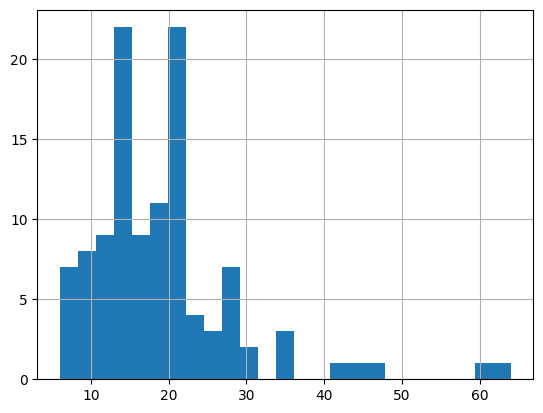

In [97]:
IBUcleaned[wheatbeers]['IBUs'].hist(bins = 25)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [105]:
IPAfilter = IBUcleaned['Style'].str.contains('IPA', na = False)
IBUcleaned[IPAfilter]['IBUs'].mean()

71.94897959183673

<Axes: >

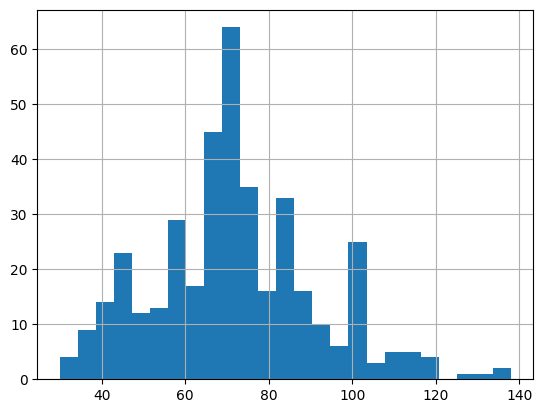

In [109]:
IBUcleaned[IPAfilter]['IBUs'].hist(bins = 25)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

array([[<Axes: title={'center': '(False, False)'}>,
        <Axes: title={'center': '(False, True)'}>],
       [<Axes: title={'center': '(True, False)'}>, <Axes: >]],
      dtype=object)

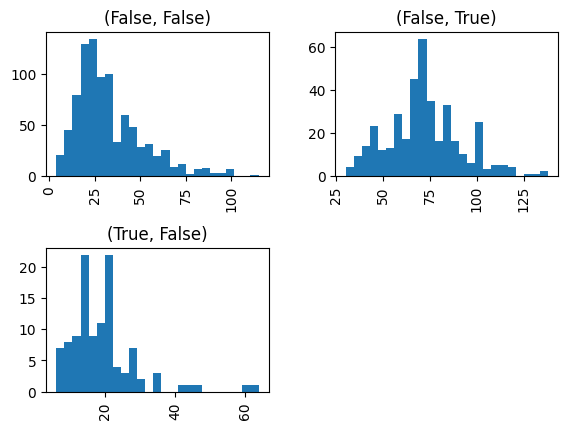

In [114]:
# IBUcleaned[wheatbeers & IPAfilter]['IBUs'].hist(bins = 25)
IBUcleaned['IBUs'].hist([wheatbeers, IPAfilter], bins = 25)

#THREE Charts?!?!

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [116]:
IBUcleaned[IPAfilter]['ABV'].mean()

6.914285714285714

In [117]:
IBUcleaned[wheatbeers]['ABV'].mean()

4.915178571428571

In [ ]:
# IPAs are stronger than wheat beers, looks like!

## Good work!

In [ ]:
# thank you!!